In [10]:
import torch
from transformers import SegformerFeatureExtractor
import sys
sys.path.insert(1, '../utils/')
import os
import numpy as np

In [2]:
from create_dataloaders import EddyDatasetTrain, EddyDatasetValid

In [3]:
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
feature_extractor.reduce_labels = False
feature_extractor.size = 128

/home/emir/anaconda3/envs/emirenv/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [4]:
input_image_dir = "/home/emir/dev/segmentation_eddies/downloads/data4test/aug_data/"
mask_image_dir = "/home/emir/dev/segmentation_eddies/downloads/data4test/aug_label/"
val_image_dir = "/home/emir/dev/segmentation_eddies/downloads/data4test/data/"
val_mask_dir = "/home/emir/dev/segmentation_eddies/downloads/data4test/label/"

In [5]:
train_len = len(os.listdir(input_image_dir))
split = int(0.85 * train_len)

In [6]:
train_data = EddyDatasetTrain(feature_extractor=feature_extractor, input_image_dir=input_image_dir, mask_image_dir=mask_image_dir, split=split)
valid_data = EddyDatasetValid(feature_extractor=feature_extractor, input_image_dir=val_image_dir, mask_image_dir=val_mask_dir, split=split)

In [7]:
len(train_data), len(valid_data)

(9180, 1620)

In [13]:
import matplotlib.pyplot as plt

In [21]:
def visualize_train_data(data):
    rand_ind = np.random.randint(len(train_data))
    fig = plt.figure(figsize=(15, 10))
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow((data[rand_ind]['pixel_values']).permute(1,2,0))
    plt.axis(False)
    plt.title("Image")
    fig.add_subplot(rows, columns, 2)
    plt.imshow((data[rand_ind]['labels']))
    plt.axis(False)
    plt.title("Label")


In [22]:
train_data[0]['labels'].shape

torch.Size([128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


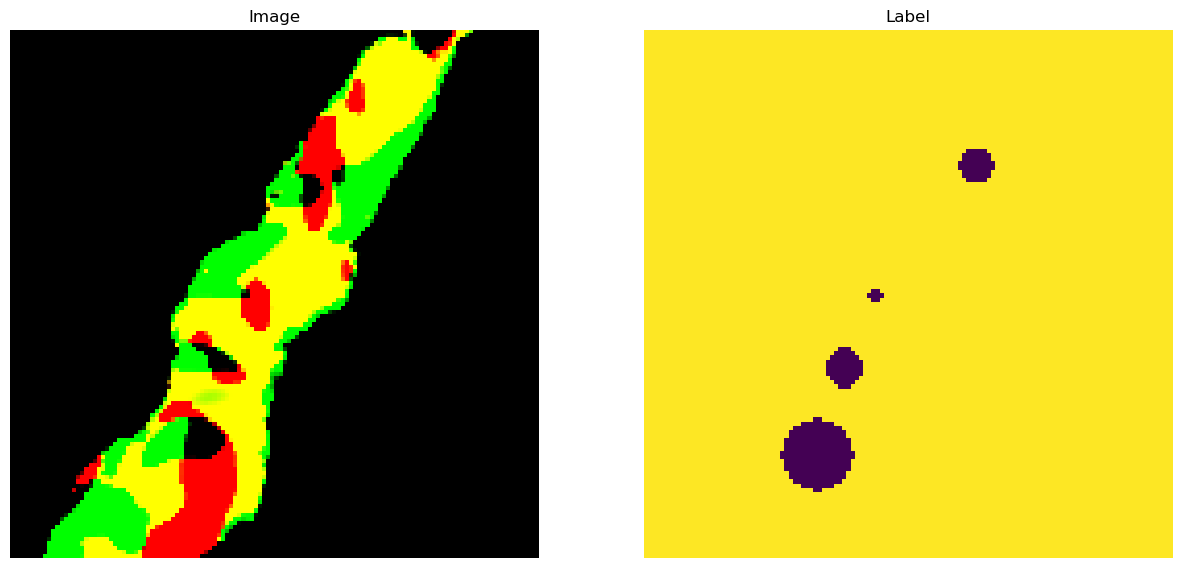

In [35]:
visualize_train_data(train_data)

In [ ]:
feature_extractor.